### JFK Airport Taxi-Out Prediction Using Linear Regression & Random Forest Regressor

#### 1. Standard Libraries

In [26]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

#### 2. Importing/Uploading data Set

In [27]:
# Import dataset
data = pd.read_csv('M1_final.csv')

#### 3. Understanding Data Set

In [28]:
## Look at 1st 5 rows
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [29]:
# Look at last 5 rows
data.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13
28819,1,31,5,B6,N958JB,BQN,-1,225,1576,1439,...,38,96,N,6,0,30.18,Cloudy,19,23,15


In [30]:
# get number of entries / rows
len(data)

28820

In [31]:
# Data Types can also be checked using "data.dtypes"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [32]:
# Check for Missing Values 
# Can also be done using "data.isnull().sum()"
data.isna().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

#### 4. Preparing Data Set

In [33]:
# Found 2 missing values in 'Wind' column
# Will drop NUNs rows below
# Only 2 rows dropped so statistically insignificant as data set was originally 28,820 rows (now 28,818)
data[data['Wind'].isna()]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
15156,12,19,4,B6,N648JB,FLL,60,189,1069,1275,...,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,41
15157,12,19,4,9E,N136EV,PWM,3,83,273,1349,...,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,40


In [34]:
# deleting 'TAIL_NUM' column as not relevant to analysis
del data['TAIL_NUM']

In [35]:
# Shows 'Dew Point' as 'Object' despite values showing as numerical in the column in above DataFrame
# Converting 'Dew Point' column from 'Object' to 'Integer'
data['Dew Point'] = data['Dew Point'].astype('int64')

#### 5. Understanding Data Set

In [36]:
# Check if 'Dew Point' has been changed from 'Object' to 'Integer' 
# Results show this has now successfully been turned into integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   DEST               28820 non-null  object 
 5   DEP_DELAY          28820 non-null  int64  
 6   CRS_ELAPSED_TIME   28820 non-null  int64  
 7   DISTANCE           28820 non-null  int64  
 8   CRS_DEP_M          28820 non-null  int64  
 9   DEP_TIME_M         28820 non-null  int64  
 10  CRS_ARR_M          28820 non-null  int64  
 11  Temperature        28820 non-null  int64  
 12  Dew Point          28820 non-null  int64  
 13  Humidity           28820 non-null  int64  
 14  Wind               28818 non-null  object 
 15  Wind Speed         28820 non-null  int64  
 16  Wind Gust          288

In [37]:
# Describe dataset
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [38]:
# Check for Correlation (Compute pairwise correlation of columns, excluding NA/null values.)
# Source: Pandas Documentation - pandas.DataFrame.corr <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html>
# numeric_only==False didn't work for me, so I must have an older version.
# So I tried it with numeric_=True instead & it seems to have worked!
corr_mat = data.corr(method='pearson', min_periods=1, numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<Axes: >

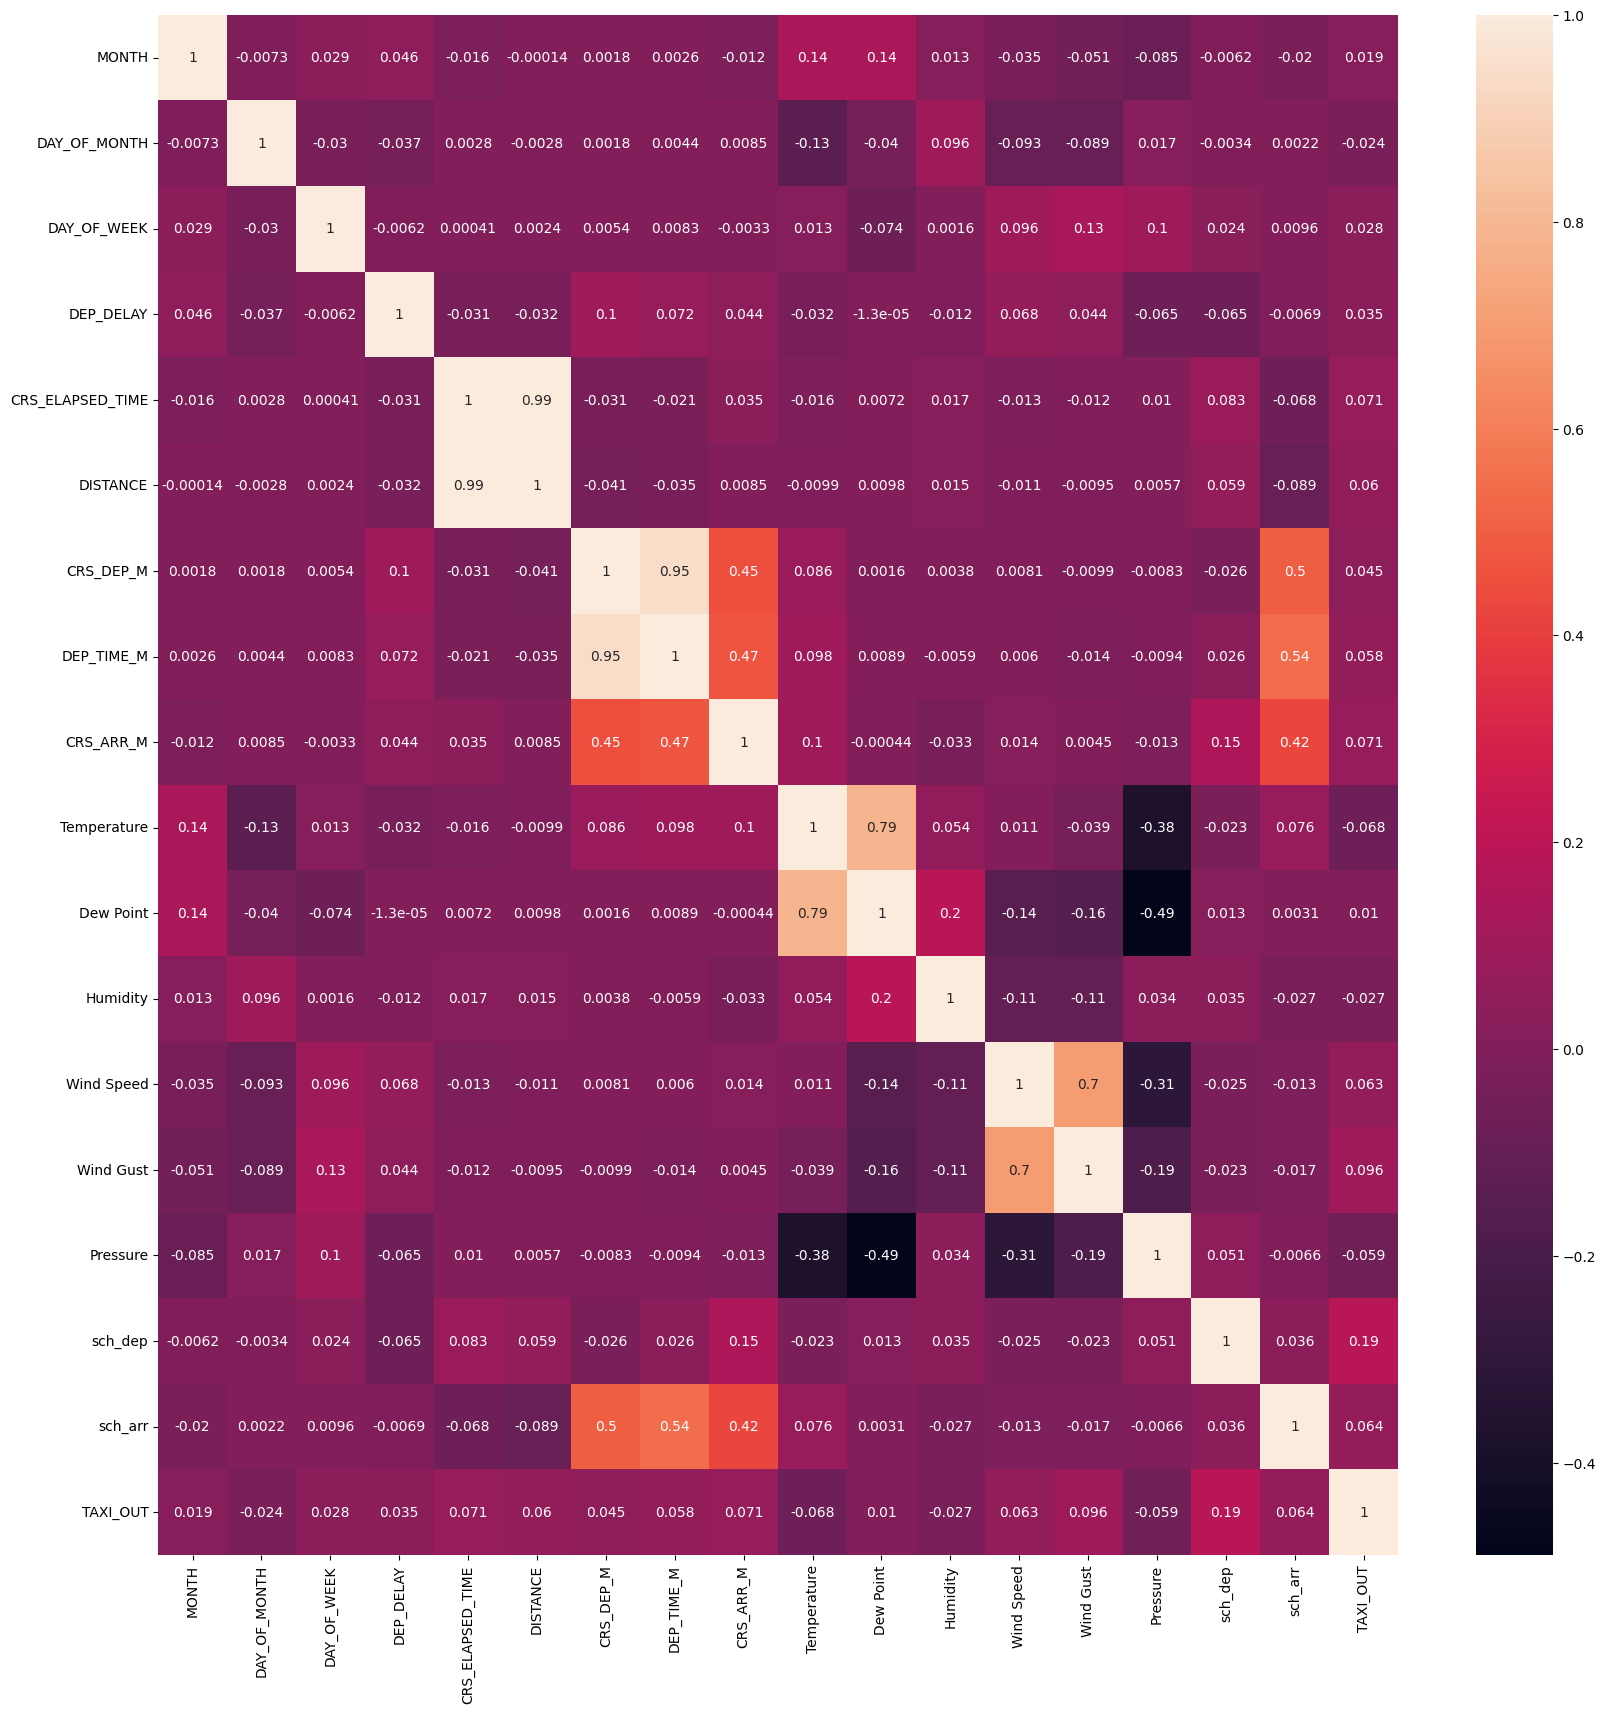

In [39]:
# Visulaisating correlation by plotting heat map in seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True)

#### 6. Splitting Data, Transforming Using One Hot Encoder & Performing Feature Scaling

In [40]:
# Split into Features (x) and Target (y)
# Can also be done by converting it into an array & then use:
# x = data.iloc[:, [1,22]].values
# y = data.iloc[:, 23].values
# But there are too many columns in my data set so will use .drop instead

x = data.drop('TAXI_OUT', axis=1)
y = data['TAXI_OUT']

In [41]:
# Splitting dataset into training & test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 32)

In [42]:
# Imported OneHotEncoder ( see imports above)
# Convert all string columns (OP_UNIQUE_CARRIER, DEST, Wind & Condition) into numerical values using OneHotEncoder
# Imported Column Convertor (see imports above) to do this
# Going to transform these 3 columns (MONTH	DAY_OF_MONTH	DAY_OF_WEEK	) as "Categorical" 
# because while there's a sequential order to them, their magnitude is not comparable.

categorical_features = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition']
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

/Users/selinabeaugrand/Library/Python/3.8/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.  ,  1.  ,  0.  , ..., 29.86,  9.  , 17.  ],
       [ 0.  ,  1.  ,  0.  , ..., 29.86,  9.  , 17.  ],
       [ 0.  ,  1.  ,  0.  , ..., 29.86,  9.  , 17.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., 30.18, 19.  , 23.  ],
       [ 1.  ,  0.  ,  0.  , ..., 30.18, 19.  , 23.  ],
       [ 1.  ,  0.  ,  0.  , ..., 30.18, 19.  , 23.  ]])

In [43]:
# Re-define & re-split data to take the newly 'transformed_x' into account
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 32)

In [44]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 7. Building & Evaluating Linear Regression Model

In [45]:
# Building a LR (Linear Regression) Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
# Making Predictions via LR Model
y_pred = model.predict(x_test)

In [47]:
# Create a DataFrame showing the actual and the predicted Taxi-Out Time
pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred

,Actual Value,Predicted Value
9362,23,24.220361
23840,14,24.392236
24617,22,21.579736
24899,19,22.454736
2007,20,17.528955
...,...,...
25685,18,21.329736
376,16,17.860986
10922,34,22.251611
7106,17,22.579736


In [48]:
model.score(x_test, y_test)

0.16179609036537979

In [50]:
## Evaluating / Checking Model via Regression Metrics
# RSQUARED
# MEAN ABSOLUTE ERROR (Calculates Average Absolute Value between Actual & Predicted values)
# MEAN SQUARED ERROR (Measures Avarage Squared Difference between Actual & Predicted Values)
# ROOT MEAN SQUARE ERROR (Square Root of Mean Square Error)
# EVALUATING LR MODEL VIA RSQUARED (0 = not good, 1 = good)

meanABerror = metrics.mean_absolute_error(y_test, y_pred)
meanSQerror = metrics.mean_squared_error(y_test, y_pred)
rootMeanSQ = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(model.score(x_test, y_test)))
print('Mean Absolute Error:', meanABerror)
print('Mean Squared Error:', meanSQerror)
print('Root Mean Square Error:', rootMeanSQ)

R squared:0.16
Mean Absolute Error: 5.0081959308504045
Mean Squared Error: 40.174746802917305
Root Mean Square Error: 6.338355212743863


#### 8. Building & Evaluating Random Forest Regressor Model

In [51]:
# Trying Random Forest Regressor (RFR) to see if yields better results
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [53]:
# Test RFR model for Accurancy Score
RFR.score(x_test, y_test)

0.3533150320308365

In [54]:
# Making Predictions via RFR Model
y_pred1 = RFR.predict(x_test)

In [55]:
# View Actual vs Predicted Values in a Data Frame
pred1 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred1})
pred1

,Actual Value,Predicted Value
9362,23,29.24
23840,14,18.66
24617,22,23.20
24899,19,19.04
2007,20,16.93
...,...,...
25685,18,18.69
376,16,18.07
10922,34,33.03
7106,17,19.46
